In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt

unix_time = 'Time since the epoch [s]'
from rich.progress import track
import time

In [2]:
df_sum = pd.read_hdf('r_data_files/data_ori_na.h5','df')
df_sum_sa = pd.read_hdf('r_data_files/data_sa_na.h5','df')


In [9]:
idd = [121,  35,  14,  46,   8,  26,  23,  34,  17,  72,  33,  97,  73,
        75,  70,  40,  19,  49,  79]

In [3]:
#
total_id_uniq = df_sum['Station ID'].values
total_id_uniq = np.unique(total_id_uniq)
print(total_id_uniq)
#5
id_record_dict = {}
for id in total_id_uniq:
    id_record_dict[id] = len(df_sum[df_sum['Station ID'] == id])
print(id_record_dict)

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122]
{3: 427534, 5: 453133, 7: 128827, 8: 505421, 9: 405943, 10: 335083, 11: 472048, 12: 487106, 13: 373397, 14: 478876, 15: 479069, 17: 482219, 18: 506179, 19: 453966, 21: 447188, 23: 503635, 24: 514036, 25: 484446, 26: 520877, 27: 87038, 30: 453700, 31: 465717, 32: 477273, 33: 428389, 34: 515512, 35: 454316, 36: 484798, 37: 481184, 39: 465934, 40: 426519, 41: 492456, 42: 475780, 43: 287071, 44: 292511, 45: 496065, 46: 501266, 47: 132198, 49: 446618, 50: 405691, 51: 455363, 53: 474741, 54: 441307, 55: 156833, 56: 346042, 57: 257244, 59: 273292, 60: 462032, 61: 265435, 62: 322947, 63: 253729, 64: 272898, 65: 362265, 66: 446345, 68: 340388,

In [4]:
total_id_uniq_new = np.unique(df_sum_sa['Station ID'].values)
id_record_dict_new = {}
for item in total_id_uniq:
    id_record_dict_new[item] = 0

for item in total_id_uniq_new:
    id_record_dict_new[item] = len(df_sum_sa[df_sum_sa['Station ID'] == item])
print(id_record_dict_new)

{3: 0, 5: 0, 7: 128827, 8: 1474665, 9: 0, 10: 0, 11: 472048, 12: 0, 13: 0, 14: 1744552, 15: 0, 17: 935352, 18: 0, 19: 789049, 21: 0, 23: 1406949, 24: 0, 25: 0, 26: 1460521, 27: 87038, 30: 0, 31: 465717, 32: 0, 33: 903130, 34: 1159058, 35: 1960866, 36: 0, 37: 0, 39: 0, 40: 799916, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 1484437, 47: 132198, 49: 787006, 50: 0, 51: 455363, 53: 0, 54: 0, 55: 156833, 56: 0, 57: 257244, 59: 273292, 60: 462032, 61: 265435, 62: 322947, 63: 253729, 64: 0, 65: 362265, 66: 0, 68: 0, 69: 264172, 70: 850025, 71: 252737, 72: 906314, 73: 896426, 75: 892165, 76: 426899, 79: 657955, 80: 435758, 81: 388595, 82: 194276, 84: 447767, 85: 0, 87: 461762, 88: 365499, 89: 548595, 92: 0, 93: 471177, 94: 0, 95: 0, 96: 473786, 97: 897072, 98: 336712, 99: 0, 100: 481359, 103: 453364, 104: 455286, 105: 0, 106: 0, 107: 0, 109: 240136, 111: 371313, 121: 4274594, 122: 0}


In [32]:
time_range_new = df_sum_sa[unix_time].values
time_min_new = np.min(time_range_new)
time_max_new = np.max(time_range_new)

In [5]:
# load time_indices_map
import pickle
with open('r_data_files/time_indices_map.pkl','rb') as f:
    time_indices_map = pickle.load(f)

with open('r_data_files/time_indices_map_new.pkl','rb') as f:
    time_indices_map_new = pickle.load(f)

In [51]:
time_indices_sum = np.zeros_like(time_indices_map[3])
time_indices_sum_new = np.zeros_like(time_indices_sum)

In [41]:
len(time_indices_sum)

546121

In [42]:
(time_max_new-time_min_new)/30

545141.1

In [52]:
for id in idd:
    time_indices_sum_new += time_indices_map_new[id]
    time_indices_sum += time_indices_map[id]

In [53]:
time_indices_sum_new = time_indices_sum_new/19
time_indices_sum_new = time_indices_sum_new.astype(int)

In [24]:
time_indices_sum_new[time_indices_sum_new < 19] = 0

In [18]:
time_indices_sum_new = np.ones_like(time_indices_sum)
for id in idd:
    time_indices_sum_new *= time_indices_map_new[id]

In [12]:
len(idd)

19

In [25]:
np.sum(time_indices_sum_new)/19

311612.0

In [26]:
time_indices_sum_new = time_indices_sum_new/19

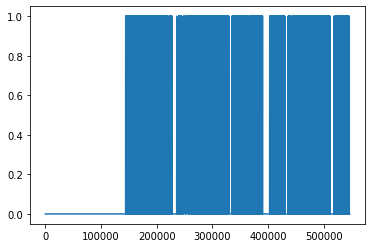

In [27]:
plt.plot(time_indices_sum_new)

In [29]:
windows = np.arange(5,20,1)
df_indies_map = {}

for window in windows:
    j = 0

    df_indies = []

    for i,item in enumerate(time_indices_sum_new):
        if 0 in time_indices_sum_new[i:i+window]:
            j += 1
        else:
            df_indies.append(i)

    df_indies_map[window] = df_indies
    print(window,len(df_indies))


5 288853
6 284965
7 281402
8 278071
9 274929
10 271958
11 269215
12 266569
13 264034
14 261582
15 259222
16 256949
17 254743
18 252605
19 250526


In [30]:
df_indies_map[5]

[144091,
 144092,
 144093,
 144094,
 144095,
 144096,
 144097,
 144098,
 144099,
 144100,
 144101,
 144102,
 144103,
 144104,
 144105,
 144106,
 144107,
 144108,
 144109,
 144110,
 144111,
 144112,
 144113,
 144114,
 144120,
 144121,
 144122,
 144123,
 144124,
 144125,
 144126,
 144127,
 144128,
 144129,
 144130,
 144131,
 144132,
 144133,
 144134,
 144135,
 144136,
 144137,
 144138,
 144139,
 144140,
 144141,
 144142,
 144143,
 144144,
 144145,
 144151,
 144152,
 144153,
 144154,
 144155,
 144156,
 144157,
 144158,
 144159,
 144160,
 144161,
 144162,
 144163,
 144164,
 144165,
 144166,
 144167,
 144168,
 144169,
 144170,
 144171,
 144172,
 144173,
 144174,
 144175,
 144176,
 144182,
 144183,
 144184,
 144185,
 144186,
 144187,
 144188,
 144189,
 144190,
 144191,
 144192,
 144193,
 144194,
 144195,
 144196,
 144197,
 144198,
 144199,
 144200,
 144201,
 144202,
 144203,
 144204,
 144205,
 144206,
 144207,
 144208,
 144209,
 144210,
 144211,
 144212,
 144213,
 144214,
 144215,
 144216,
 

In [40]:
time_indices_sum_new[df_indies_map[5]]

array([1., 1., 1., ..., 1., 1., 1.])

In [58]:
test_id_list = np.unique(df_sum_sa[(df_sum_sa[unix_time] > 144091*30+time_min_new)&(df_sum_sa[unix_time] <= 144091*30+30+time_min_new)]['Station ID'].values)
print(test_id_list)

[  8  11  14  17  19  23  26  31  33  34  35  40  46  49  51  59  60  62
  70  71  72  73  75  76  79  80  81  82  87  88  89  93  96  97  98 100
 103 104 109 111 121]


In [60]:
for id in idd:
    if id not in test_id_list:
        print(id)

In [64]:
(idd == np.intersect1d(idd,test_id_list)).all()

False

In [65]:
np.intersect1d(idd,test_id_list)

array([  8,  14,  17,  19,  23,  26,  33,  34,  35,  40,  46,  49,  70,
        72,  73,  75,  79,  97, 121])

In [70]:
(np.unique(idd) == np.intersect1d(idd,test_id_list)).all()

True

In [74]:
window = 5
error_count = 0
count = 0
df_indies_tmp = df_indies_map[window]
for time_stamp in track(df_indies_tmp):
    test_id_list = np.unique(df_sum_sa[(df_sum_sa[unix_time] > time_stamp*30+time_min_new)&(df_sum_sa[unix_time] <= time_stamp*30+30+time_min_new)]['Station ID'].values)
    if (np.unique(idd) == np.intersect1d(idd,test_id_list)).all() == False:
        error_count += 1
    count += 1
    print(count)
    

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 4:00:56

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

KeyboardInterrupt: 

In [75]:
window = 5
error_count = 0
count = 0
df_indies_tmp = df_indies_map[window]
for time_stamp in track(df_indies_tmp):
    test_id_list = np.unique(df_sum_sa[(df_sum_sa[unix_time] > time_stamp*30+time_min_new)&(df_sum_sa[unix_time] <= time_stamp*30+30+time_min_new)]['Station ID'].values)
    if (np.unique(idd) == np.intersect1d(idd,test_id_list)).all() == False:
        error_count += 1
    count += 1
    print(count)

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   1% 3:57:39

2644

2645

2646

2647

2648

2649

2650

2651

2652

2653

2654

2655

2656

2657

2659

2660

2661

2662

2663

2664

2665

2666

2667

2668

2669

2670

2671

2672

2673

2674

2675

2676

2677

2678

2679

2680

2681

2682

2683

2684

2685

2686

2687

2688

2689

2690

2691

2692

2693

2694

2695

2696

2697

2698

2700

2701

2702

2703

2704

2705

2706

2707

2708

2709

2710

2711

2712

2713

2714

2715

2716

2717

2718

2719

2720

2721

2722

2723

2724

2725